In [45]:
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt

# Set the path to the folder containing audio files
audio_folder = "4way-tabla-ismir21-dataset/train/audios"  # Replace with the path to your audio files folder

# Set the parameters for Mel spectrogram
n_fft = 256  # Number of points in each FFT
hop_length = n_fft  # Hop size
fft_len = n_fft//2 + 1  # Number of Mel bands
window = "hann"  # Window function
stft_taken = fft_len//4

# Initialize an empty matrix to store the spectrograms
spectrogram_matrix = []
stft_matrix = []
mfcc_matrix = []
flux_arr = []
lengths = []

# Iterate through audio files in the folder
for filename in sorted(os.listdir(audio_folder)):
    if filename.endswith(".wav"):  # Adjust the file extension if needed
        audio_path = os.path.join(audio_folder, filename)

        # Load the audio file
        y, sr = librosa.load(audio_path)
        if sr != 22050:
            print(sr)
        # Calculate the spectrogram
        #mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=fft_len, window=window)
        stft = np.abs(librosa.stft(y=y, n_fft=n_fft, hop_length=hop_length, window=window))
        #mfcc = librosa.feature.mfcc(y=y, n_mfcc=13, sr=sr)
        flux = librosa.onset.onset_strength(y=y, sr=sr, n_fft=n_fft, hop_length = hop_length)
        flux = flux/flux.max()

        #lengths.append(len(mel_spec[0]))
        # Append the spectrogram to the matrix
        #spectrogram_matrix.append(mel_spec)
        stft_matrix.append(stft[:stft_taken,:])
        #mfcc_matrix.append(mfcc)
        flux_arr.append(flux)

# Convert the spectrogram matrix to a NumPy array
#spectrogram_matrix = np.hstack(spectrogram_matrix)
stft_matrix = np.hstack(stft_matrix)
#mfcc_matrix = np.hstack(mfcc_matrix)
flux_arr = np.hstack(flux_arr)


In [46]:
print(flux.shape)
print(stft.shape)
print(flux_arr.shape)
print(stft_matrix.shape)

(468,)
(129, 468)
(404278,)
(32, 404278)


In [47]:
stft.shape

(129, 468)

In [48]:
del_stft = librosa.feature.delta(stft_matrix)
del2_stft = librosa.feature.delta(stft_matrix, order=2)
features = np.concatenate((stft_matrix, del_stft, del2_stft))
del_mfcc = librosa.feature.delta(mfcc)

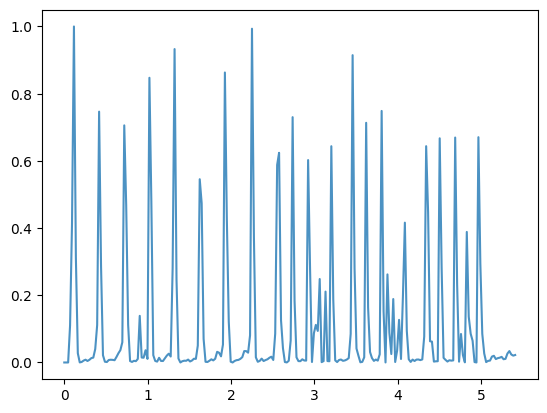

In [ ]:
fig, ax = plt.subplots(nrows=1, sharex=True)
times = librosa.times_like(stft)
ax.plot(times, flux, alpha=0.8, label='Mean (mel)')

In [ ]:
times

array([0.        , 0.02321995, 0.04643991, 0.06965986, 0.09287982,
       0.11609977, 0.13931973, 0.16253968, 0.18575964, 0.20897959,
       0.23219955, 0.2554195 , 0.27863946, 0.30185941, 0.32507937,
       0.34829932, 0.37151927, 0.39473923, 0.41795918, 0.44117914,
       0.46439909, 0.48761905, 0.510839  , 0.53405896, 0.55727891,
       0.58049887, 0.60371882, 0.62693878, 0.65015873, 0.67337868,
       0.69659864, 0.71981859, 0.74303855, 0.7662585 , 0.78947846,
       0.81269841, 0.83591837, 0.85913832, 0.88235828, 0.90557823,
       0.92879819, 0.95201814, 0.9752381 , 0.99845805, 1.021678  ,
       1.04489796, 1.06811791, 1.09133787, 1.11455782, 1.13777778,
       1.16099773, 1.18421769, 1.20743764, 1.2306576 , 1.25387755,
       1.27709751, 1.30031746, 1.32353741, 1.34675737, 1.36997732,
       1.39319728, 1.41641723, 1.43963719, 1.46285714, 1.4860771 ,
       1.50929705, 1.53251701, 1.55573696, 1.57895692, 1.60217687,
       1.62539683, 1.64861678, 1.67183673, 1.69505669, 1.71827

In [ ]:
librosa.onset.onset_detect(y=y, sr=sr, units='time')

array([0.09287982, 0.41795918, 0.71981859, 0.90557823, 1.021678  ,
       1.30031746, 1.62539683, 1.92725624, 2.2523356 , 2.55419501,
       2.73995465, 2.92571429, 3.06503401, 3.20435374, 3.45977324,
       3.62231293, 3.80807256, 3.87773243, 3.94739229, 4.06349206,
       4.34213152, 4.5046712 , 4.69043084, 4.82975057, 4.96907029])

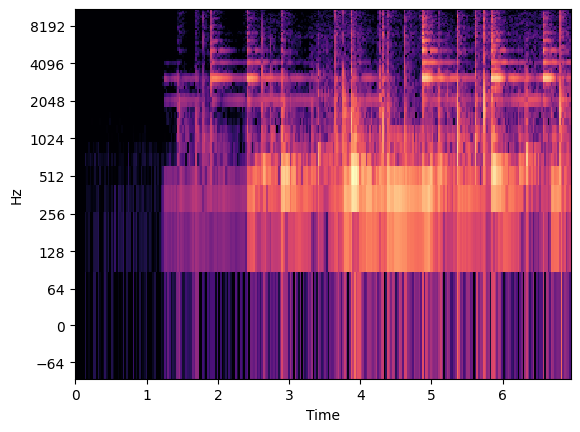

In [ ]:
librosa.display.specshow(librosa.amplitude_to_db(stft_matrix[:,:300], ref=np.max), y_axis='log', x_axis='time')

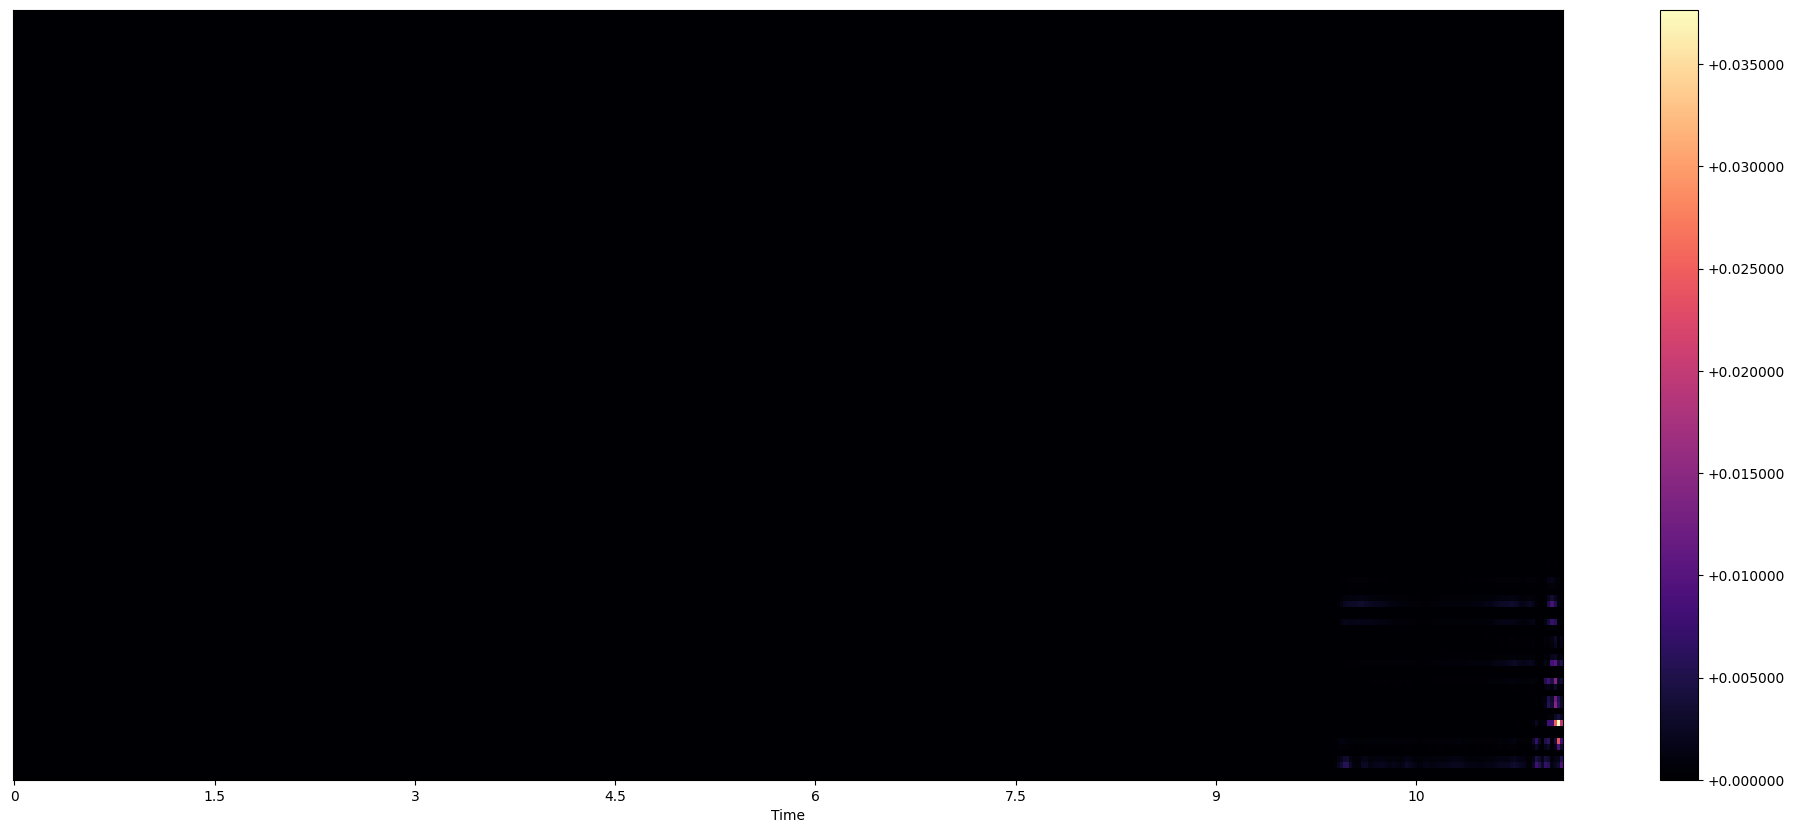

In [ ]:
#Plot
plt.figure(figsize=(25,10))
librosa.display.specshow(spectrogram_matrix[:,:500], x_axis="time",sr=sr)
plt.colorbar(format="%+2f")
plt.show()

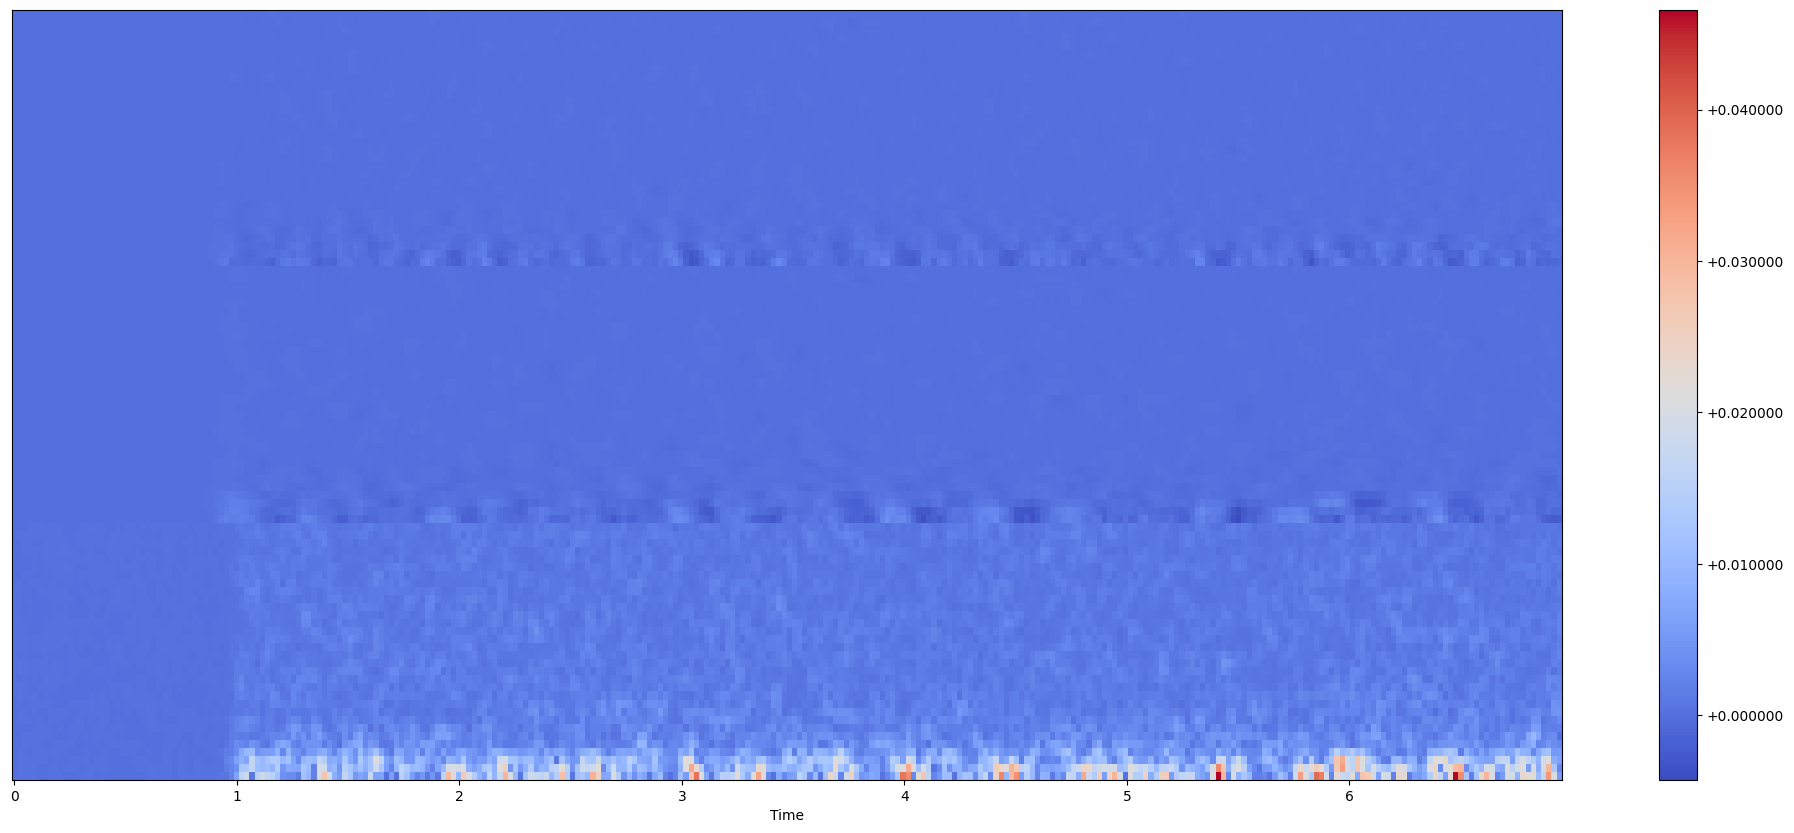

In [ ]:
#Plot
plt.figure(figsize=(25,10))
librosa.display.specshow(features[:,:300], x_axis="time",sr=sr)
plt.colorbar(format="%+2f")
plt.show()

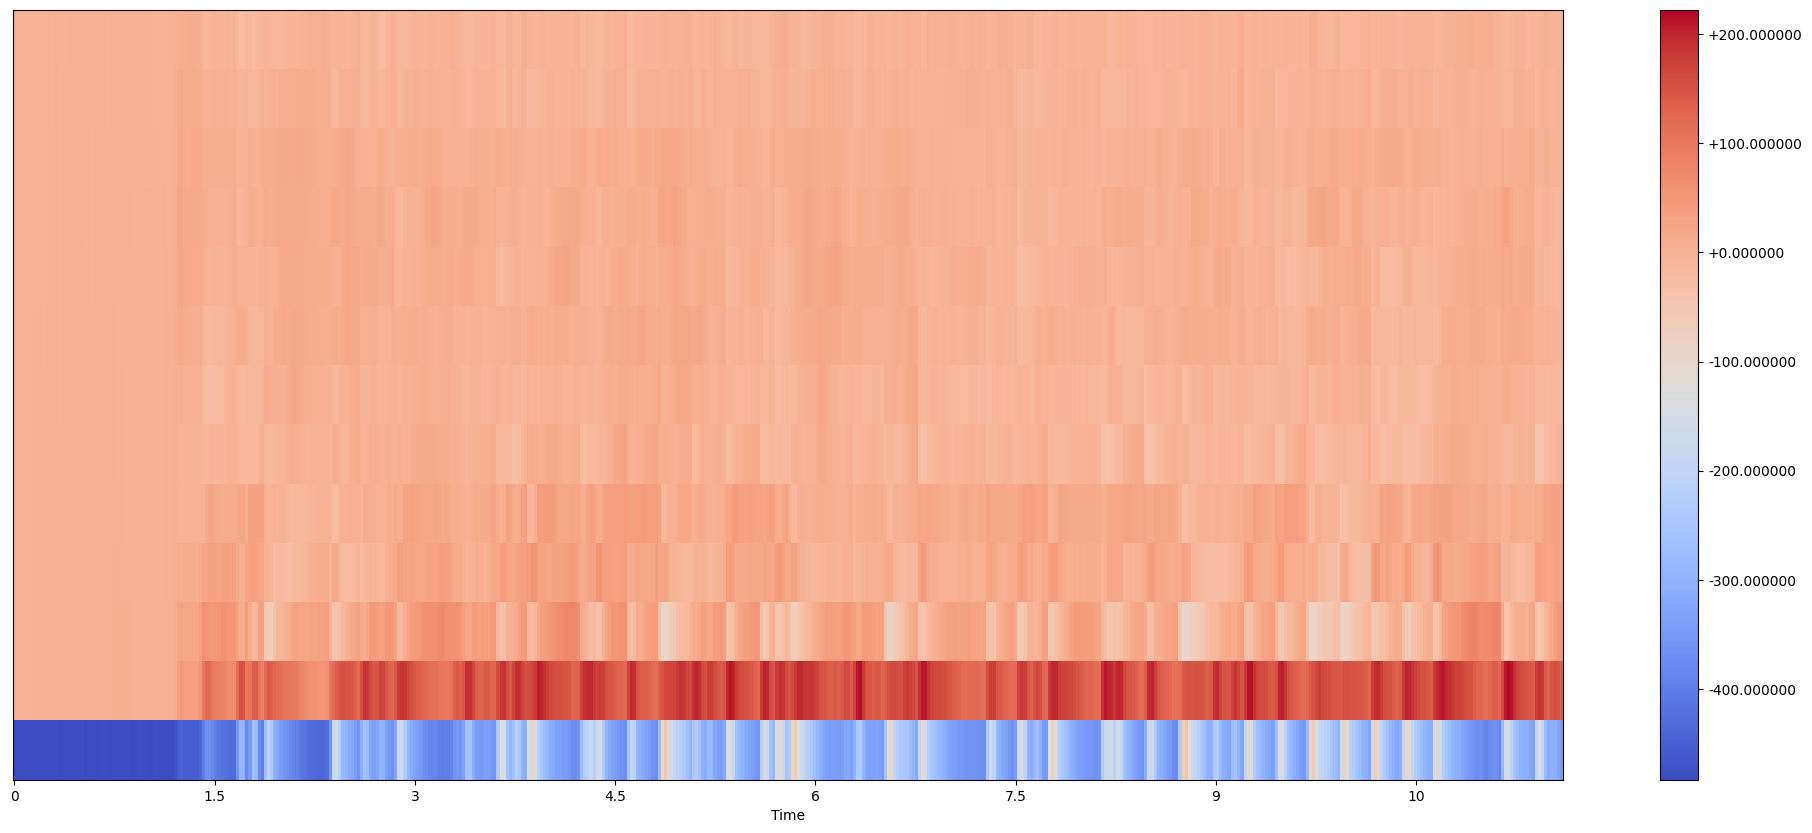

In [ ]:
#Plot
plt.figure(figsize=(25,10))
librosa.display.specshow(mfcc_matrix[:,:500], x_axis="time",sr=sr)
plt.colorbar(format="%+2f")
plt.show()

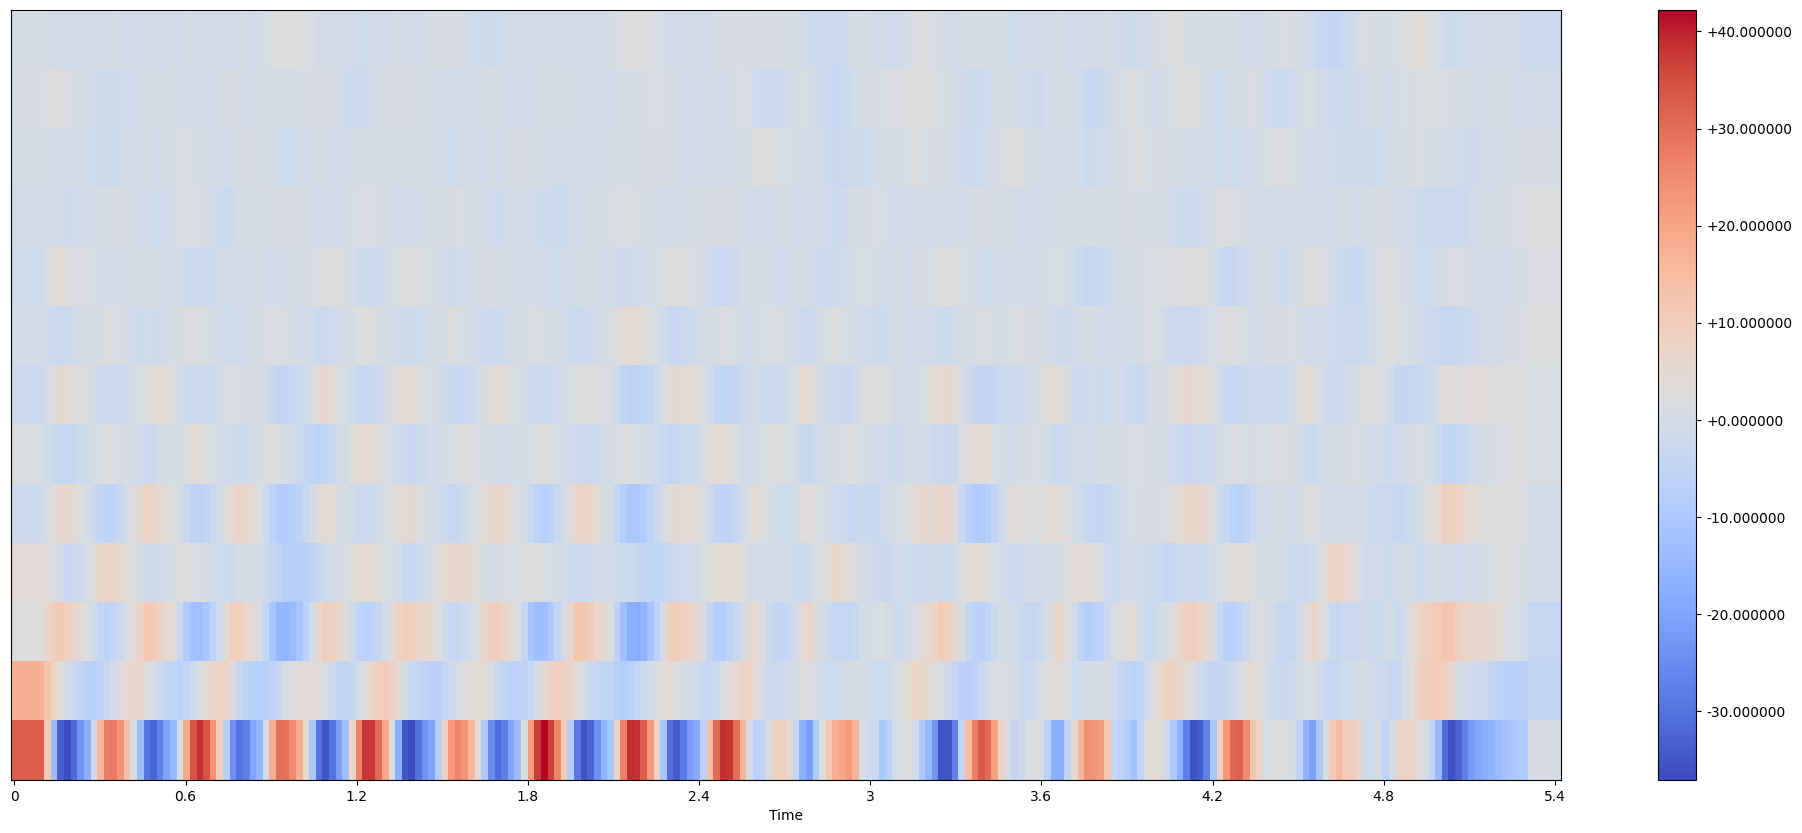

In [ ]:
#Plot
plt.figure(figsize=(25,10))
librosa.display.specshow(del_mfcc[:,:500], x_axis="time",sr=sr)
plt.colorbar(format="%+2f")
plt.show()

In [ ]:
# Transpose the matrix to have time along rows and frequency components along columns
spectrogram_matrix = spectrogram_matrix.T
stft_matrix = stft_matrix.T
features = features.T

In [ ]:
print(stft_matrix.max())
print(del_stft.max())
print(del2_stft.max())

59.008404
8.933539
4.1441393


In [ ]:
features.shape

(1616779, 96)

In [ ]:
# Define the time_step of the audio file
time_step = hop_length/22050

audio_folder = "4way-tabla-ismir21-dataset/train/audios" 
onset_folder = "4way-tabla-ismir21-dataset/train/onsets"

# Initialize an empty matrix to store the spectrograms
label_array = []
lens = []

for filename in sorted(os.listdir(audio_folder)):

    file_name, extension = os.path.splitext(filename)
    onsetfile = f"{file_name}.{'onsets'}"

    # Provide the path to your audio file
    audio_file_path = os.path.join(audio_folder, filename)
    
    # Load the audio file
    y, sr = librosa.load(audio_file_path)

    # Calculate the duration of the audio in seconds
    audio_duration = librosa.get_duration(y=y, sr=sr)


    # Calculate the number of time steps and initialize the array with zeros
    num_time_steps = int(audio_duration / time_step)
    num_time_steps += 1
    stroke_array = np.zeros(num_time_steps)
    
    # Read the .ONSETS file to get the times of the strokes
    for i in ["b", "d", "rb", "rt"]:
        file_path = os.path.join(onset_folder, i, onsetfile)
        with open(file_path, 'r') as file:
            stroke_times = [float(line.strip()) for line in file]

        # Set the values to 1 where there is a stroke within the time period
        for stroke_time in stroke_times:
            time_step_index = int(stroke_time / time_step)
            if time_step_index < num_time_steps:
                stroke_array[time_step_index] = 1
        
    
    label_array.append(stroke_array)
    lens.append(len(stroke_array))

label_array.append(0)
label_array = np.hstack(label_array)

label_array = label_array.T

    


In [ ]:
label_array.shape

(1616779,)

In [ ]:
#Genrate train and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, label_array, test_size=0.8, random_state=42)

In [ ]:
#Ckeck the no. of -ve and +ve values to check class imbalance
zero = 0
one = 0

for i in y_train:
    if i==0:
        zero+=1
    elif i==1:
        one+=1

print(zero, ", ", one)

#Find class imbalance
print(one*100/(zero+one), "% Positive Values")

318231 ,  5124
1.5846360810873499 % Positive Values


In [ ]:
print(x_train.shape)
print(y_train.shape)

(323355, 96)
(323355,)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x_train, y_train)
x_test_sm, y_test_sm = smote.fit_resample(x_test, y_test)

unique, frequency = np.unique(y_sm, return_counts = True)
# print unique values array
print("Unique Values:", unique)
 
# print frequency array
print("Frequency Values:", frequency)

In [ ]:
print(stft_taken)

In [ ]:
import tensorflow as tf
from tensorflow_addons.metrics import F1Score

#Define the model architecture
new_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(200, input_shape = (3*stft_taken,)),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.5),

  # tf.keras.layers.Dense(400),
  # tf.keras.layers.Activation('relu'),
  # tf.keras.layers.Dropout(0.5),
  # tf.keras.layers.Dense(500, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(200),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.5),

  tf.keras.layers.Dense(100),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.5),
  # tf.keras.layers.Dense(150, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.5),
  # tf.keras.layers.Dense(50, activation='relu'),
  # tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(25),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(10),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.Dense(5),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Create an instance of the F1Score metric.
f1_score = F1Score(num_classes=2, average='micro')


loss = tf.keras.losses.BinaryFocalCrossentropy(gamma = 5.0)

new_model.compile(optimizer = 'adam', loss = 'binary_focal_crossentropy', metrics=['accuracy', f1_score])

In [ ]:
import tensorflow as tf
from tensorflow_addons.metrics import F1Score

#Define the model architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(200, input_shape = (3*stft_taken,), use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(400, use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.5),
  # tf.keras.layers.Dense(500, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(200, use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(100, use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.5),
  # tf.keras.layers.Dense(150, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(50, use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.5),
  # tf.keras.layers.Dense(50, activation='relu'),
  # tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(25, use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5, use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Create an instance of the F1Score metric.
f1_score = F1Score(num_classes=2, average='micro')

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy', f1_score])

In [ ]:
def reinitialize(model):
    for l in model.layers:
        if hasattr(l,"kernel_initializer"):
            l.kernel.assign(l.kernel_initializer(tf.shape(l.kernel)))
        if hasattr(l,"bias_initializer"):
            l.bias.assign(l.bias_initializer(tf.shape(l.bias)))
        if hasattr(l,"recurrent_initializer"):
            l.recurrent_kernel.assign(l.recurrent_initializer(tf.shape(l.recurrent_kernel)))

In [ ]:
reinitialize(new_model)

c:\Users\chinm\anaconda3\envs\tf\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
#Train the model

# checkpoint
filepath="./checkpoints6/weights-improvement-{epoch:02d}-{accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
model.fit(x_train, y_train, epochs=100, callbacks=callbacks_list)

Epoch 1/100
10105/10105 [==============================] - ETA: 0s - loss: 0.0856 - accuracy: 0.9796 - f1_score: 0.0312
Epoch 1: accuracy improved from -inf to 0.97962, saving model to ./checkpoints6\weights-improvement-01-0.98.hdf5
10105/10105 [==============================] - 137s 13ms/step - loss: 0.0856 - accuracy: 0.9796 - f1_score: 0.0312
Epoch 2/100
10104/10105 [============================>.] - ETA: 0s - loss: 0.0565 - accuracy: 0.9842 - f1_score: 0.0312
Epoch 2: accuracy improved from 0.97962 to 0.98415, saving model to ./checkpoints6\weights-improvement-02-0.98.hdf5
10105/10105 [==============================] - 133s 13ms/step - loss: 0.0565 - accuracy: 0.9842 - f1_score: 0.0312
Epoch 3/100
10104/10105 [============================>.] - ETA: 0s - loss: 0.0543 - accuracy: 0.9842 - f1_score: 0.0312
Epoch 3: accuracy did not improve from 0.98415
10105/10105 [==============================] - 135s 13ms/step - loss: 0.0543 - accuracy: 0.9842 - f1_score: 0.0312
Epoch 4/100
10105/1

In [ ]:
# load weights
model.load_weights("checkpoints3/weights-improvement-01-0.92.hdf5")

In [ ]:
model.build(input_shape = (3*stft_taken,))

In [ ]:

model.load_weights("checkpoints3/weights-improvement-01-0.92.hdf5")

In [ ]:
#Test the model with test data
model.evaluate(x_test_sm,  y_test_sm, verbose=2)

Model performs great in training but during testing

Performs horribly on test data
Performed great on SMOTEd test data

=> SMOTE doesn't generate good synthetic sample and hence the model 

In [ ]:
model.save_weights('./checkpoints4/weightsFinal')

In [ ]:
model.save('model1')

In [44]:
i

NameError: name 'i' is not defined